In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [3]:
# Check how many values are missing in each column
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [4]:
# Drop unnecessary columns
df = df.drop(columns=['Number', 'Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight', 'Street', 'City', 
                      'Zipcode', 'Timezone','ID', 'End_Lat', 'End_Lng', 'Country', 'Airport_Code', 
                      'Weather_Timestamp', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 
                      'Wind_Speed(mph)'])

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Side,County,State,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,R,Franklin,OH,42.1,10.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,R,Montgomery,OH,36.9,10.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,R,Hamilton,OH,36.0,10.0,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,R,Summit,OH,39.0,10.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,R,Hamilton,OH,37.0,10.0,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


In [6]:
precip_missing = df[df['Precipitation(in)'].isnull()]
precip_missing['Weather_Condition'].value_counts()
# Looks like the reason precipitation is missing in some rows is because there was no accumulated precipitation 
# during the time of the accident.

Clear                 172786
Overcast               72357
Mostly Cloudy          72029
Partly Cloudy          51271
Fair                   45103
                       ...  
Small Hail                 1
Wintry Mix / Windy         1
Snow / Windy               1
Heavy Ice Pellets          1
Light Haze                 1
Name: Weather_Condition, Length: 80, dtype: int64

In [7]:
# We can replace the null values in the precipitation column with 0
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0.0)

In [8]:
# Now we can drop the rest of the columns with missing values.
df = df.dropna()
df.isnull().sum()
# Voila! No more missing values, as you can see.

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Side                 0
County               0
State                0
Temperature(F)       0
Visibility(mi)       0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Civil_Twilight       0
dtype: int64

In [9]:
# There are over 100 types of weather conditions. We only want the most common. 

condition_value_counts = df['Weather_Condition'].value_counts()
condition_value_counts


Fair                                   1097777
Mostly Cloudy                           362226
Cloudy                                  346177
Partly Cloudy                           248337
Clear                                   172509
                                        ...   
Heavy Rain Showers                           1
Light Haze                                   1
Heavy Thunderstorms with Small Hail          1
Sand / Dust Whirlwinds / Windy               1
Thunder and Hail / Windy                     1
Name: Weather_Condition, Length: 125, dtype: int64

In [10]:
# Drop all rows with weather conditions under 600 occurrences
condition_value_counts = condition_value_counts[condition_value_counts > 600]
df = df[df['Weather_Condition'].isin(condition_value_counts.index)]

In [94]:
# Some of the weather conditions mean the same thing ("Rain Shower" and "Rain Showers", for example.)

# Fair <- Clear, Fair / Windy, N/A Precipitation
# Cloudy <- Overcast, Cloudy / Windy, Mostly Cloudy, Mostly Cloudy / Windy
# Partly Cloudy <- Scattered Clouds, Partly Cloudy / Windy
# Rain <- Heavy Rain, Rain / Windy, Heavy Rain / Windy
# Light Rain <- Mist, Light Drizzle, Light Rain / Windy, Drizzle, Showers in the Vicinity
# Snow <- Heavy Snow
# Light Snow <- Light Snow / Windy
# Wintry Mix <- Light Freezing Rain
# Thunderstorm <- T-Storm, Heavy T-Storm
# Light Thunderstorm <- Thunder in the Vicinity, Thunder, Light Rain with Thunder, Light Thunderstorms and Rain
# Fog <- Haze, Patches of Fog, Shallow Fog, Haze / Windy, Fog / Windy
# Smoke

weather_lookup = {
    'Fair': 'Fair',
    'Clear': 'Fair',
    'Fair / Windy': 'Fair',
    'N/A Precipitation': 'Fair',
    'Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Cloudy / Windy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Mostly Cloudy / Windy': 'Cloudy',
    'Partly Cloudy': 'Fair',
    'Scattered Clouds': 'Fair',
    'Partly Cloudy / Windy': 'Fair',
    'Rain': 'Rain',
    'Heavy Rain': 'Rain',
    'Rain / Windy': 'Rain',
    'Heavy Rain / Windy': 'Rain',
    'Light Rain': 'Light Rain',
    'Mist': 'Light Rain',
    'Light Drizzle': 'Light Rain',
    'Light Rain / Windy': 'Light Rain',
    'Drizzle': 'Light Rain',
    'Showers in the Vicinity': 'Light Rain',
    'Snow': 'Snow',
    'Heavy Snow': 'Snow',
    'Light Snow': 'Light Snow',
    'Light Snow / Windy': 'Light Snow',
    'Wintry Mix': 'Wintry Mix',
    'Light Freezing Rain': 'Wintry Mix',
    'Thunderstorm': 'Thunderstorm',
    'T-Storm': 'Thunderstorm',
    'Heavy T-Storm': 'Thunderstorm',
    'Light Thunderstorm': 'Light Thunderstorm',
    'Thunder in the Vicinity': 'Light Thunderstorm',
    'Thunder': 'Light Thunderstorm',
    'Light Rain with Thunder': 'Light Thunderstorm',
    'Light Thunderstorms and Rain': 'Light Thunderstorm',
    'Fog': 'Fog',
    'Haze': 'Fog',
    'Patches of Fog': 'Fog',
    'Shallow Fog': 'Fog',
    'Haze / Windy': 'Fog',
    'Fog / Windy': 'Fog',
    'Smoke': 'Smoke'
}

df['Weather_Condition'] = df.Weather_Condition.map(weather_lookup)
df['Weather_Condition'].value_counts()

Fair                  1583324
Cloudy                 805583
Light Rain             141513
Fog                     79013
Light Snow              45603
Rain                    44334
Light Thunderstorm      19181
Thunderstorm            11067
Smoke                    7171
Snow                     6656
Wintry Mix               4732
Name: Weather_Condition, dtype: int64

In [12]:
# Converting the date strings to dateTime objects
df['Time_Formatted'] = df.Start_Time.map(pd.to_datetime)

In [193]:
# Convert distance from strings to floats
df['Distance(mi)'] = df['Distance(mi)'].astype(float)

# Removing distance outliers
upper_limit = df['Distance(mi)'].quantile(.98)
df = df[(df['Distance(mi)'] < upper_limit)]

/var/folders/d5/t2lfq_5x0ps22qyxb5yv98c00000gn/T/ipykernel_9700/397182083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance(mi)'] = df['Distance(mi)'].astype(float)


In [14]:
# Number of crashes per capita per state (bar graph)
# Accident severity to miles of road closed (violin plot)
# Accident severity in day vs night (pie plot)??
# Proportion of accidents that are severe by county in pennsylvana
# Proportion of accidents that are severe for each weather condition (horizontal pie plot)
# Number of accidents for each day of the week (line graph)
# Number of accidents per month for the entire 5 year period (line graph)
# Histogram of time of day that accidents occur (for both weekdays and weekends)

In [68]:
# Load in state populations to make first graph
populations = pd.read_csv('State Populations.csv')
populations
# This data has 51 states, including DC, while the car accidents dataset leaves out Hawaii and Alaska.
# Furthermore, we should probably convert the state name abbreviations in the big dataset to their actual names to match it up with this dataset.

,State,2018 Population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989
5,Illinois,12768320
6,Ohio,11694664
7,Georgia,10545138
8,North Carolina,10390149
9,Michigan,9991177


In [93]:
state_lookup = {
    'CA':'California',
    'FL':'Florida',
    'TX':'Texas',
    'OR':'Oregon',
    'NY':'New York',
    'VA':'Virginia',
    'PA':'Pennsylvania',
    'MN':'Minnesota',
    'NC':'North Carolina',
    'SC':'South Carolina',
    'AZ':'Arizona',
    'MD':'Maryland',
    'TN':'Tennessee',
    'NJ':'New Jersey',
    'IL':'Illinois',
    'LA':'Louisiana',
    'UT':'Utah',
    'MI':'Michigan',
    'GA':'Georgia',
    'WA':'Washington',
    'CT':'Connecticut',
    'MO':'Missouri',
    'CO':'Colorado',
    'OH':'Ohio',
    'IN':'Indiana',
    'AL':'Alabama',
    'MT':'Montana',
    'AR':'Arkansas',
    'IA':'Iowa',
    'DC':'District of Columbia',
    'OK':'Oklahoma',
    'ID':'Idaho',
    'WI':'Wisconsin',
    'KS':'Kansas',
    'WV':'West Virginia',
    'KY':'Kentucky',
    'MA':'Massachusetts',
    'NV':'Nevada',
    'MS':'Mississippi',
    'DE':'Delaware',
    'RI':'Rhode Island',
    'NH':'New Hampshire',
    'NE':'Nebraska',
    'NM':'New Mexico',
    'ME':'Maine',
    'ND':'North Dakota',
    'WY':'Wyoming',
    'VT':'Vermont',
    'SD':'South Dakota'
}

df['State_Name'] = df.State.map(state_lookup)


In [70]:
accidents_per_state = df['State_Name'].value_counts().to_frame()
accidents_per_state = accidents_per_state.sort_index()
populations = populations.set_index('State')
populations = populations.sort_index()


In [105]:
populations.drop(['Alaska', 'Hawaii'])
accidents_per_capita = accidents_per_state.merge(populations, left_on=accidents_per_state.index, right_on='State')
accidents_per_capita = accidents_per_capita.rename(columns={'State_Name': 'Accidents'})
accidents_per_capita['Accidents Per Capita'] = accidents_per_capita['Accidents'] / accidents_per_capita['2018 Population']
accidents_per_capita = accidents_per_capita.sort_values(by='Accidents Per Capita', ascending=False)

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(accidents_per_capita['Accidents Per Capita'].values.reshape(-1,1))
accidents_per_capita['Per Capita Scaled'] = scaler.transform(accidents_per_capita['Accidents Per Capita'].values.reshape(-1,1))
accidents_per_capita

,State,Accidents,2018 Population,Accidents Per Capita,Per Capita Scaled
35,Oregon,122997,4199563,0.029288,1.000000
3,California,768915,39776830,0.019331,0.657651
8,Florida,393065,21312211,0.018443,0.627135
38,South Carolina,86832,5088916,0.017063,0.579681
21,Minnesota,94158,5628162,0.016730,0.568226
42,Utah,44446,3159345,0.014068,0.476713
24,Montana,14858,1062330,0.013986,0.473898
44,Virginia,105207,8525660,0.012340,0.417299
7,District of Columbia,8672,703608,0.012325,0.416784
16,Louisiana,46184,4682509,0.009863,0.332137


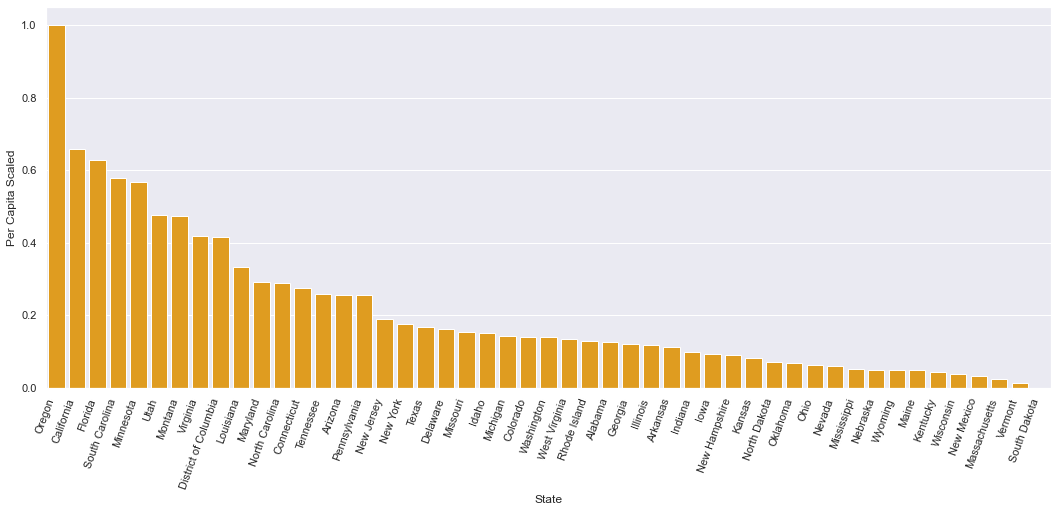

In [144]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(18,7))
ax = plt.axes()
sns.barplot(x="State", y='Per Capita Scaled', data=accidents_per_capita, color='orange', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right')
plt.show()

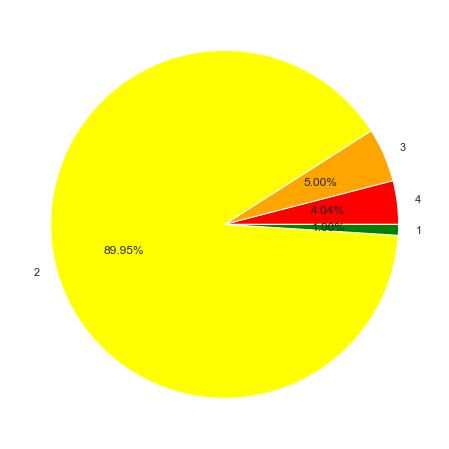

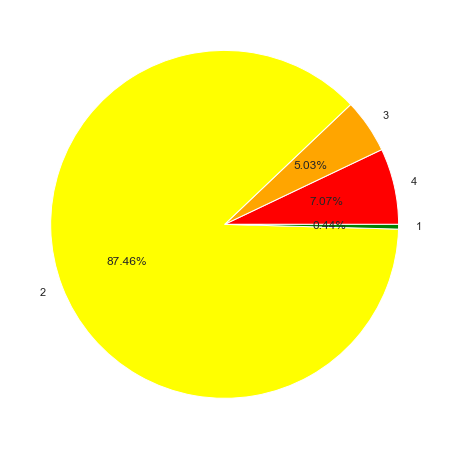

In [209]:
# Pie chart of accident severity
plt.figure(figsize=(8,8))
severity_counts_fair = df[df['Weather_Condition'] == 'Fair'].groupby(['Severity']).size().sort_index(ascending=False)
plt.pie(severity_counts_fair, labels=severity_counts_fair.index, colors=['red', 'orange', 'yellow', 'green'], autopct='%.2f%%')
plt.show()

plt.figure(figsize=(8,8))
severity_counts_snow = df[df['Weather_Condition'] == 'Snow'].groupby(['Severity']).size().sort_index(ascending=False)
plt.pie(severity_counts_snow, labels=severity_counts_snow.index, colors=['red', 'orange', 'yellow', 'green'], autopct='%.2f%%')
plt.show()
# should turn this into a side by side graph

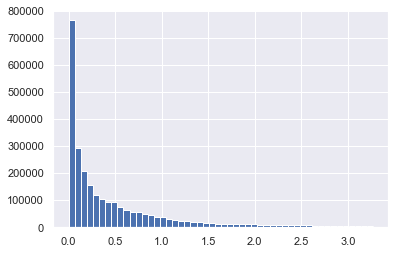

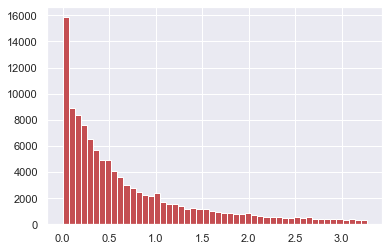

In [221]:
# histogram of amount of road closed
severity_all = df
severity_4 = df[df['Severity'] == 4]

plt.hist(severity_all['Distance(mi)'], bins=50, color='b')
plt.show()
plt.hist(severity_4['Distance(mi)'], bins=50, color='r')
plt.show()

# Should probably combine these